In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SARVPREET
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to C:\Users\SARVPREET
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import re


QUESTION-1

In [7]:
text="""Life is a series of natural and spontaneous changes. Don't resist them; that only creates sorrow. Let reality be reality. Let things flow naturally forward in whatever way they like."""
text_clean=re.sub(r'[^\w\s]', '', text.lower())
print("Cleaned Text:\n", text_clean)

words_nltk= word_tokenize(text_clean) 
sentences= sent_tokenize(text)

print("\nSentences:\n",sentences)
print("\nWord tokens:\n", words_nltk)

words_split=text_clean.split()
print("\nWords (Python split):\n", words_split)
print("\nDifference in token counts:")
print(f"split():{len(words_split)}, word_tokenize():{len(words_nltk)}")

stop_words=set(stopwords.words('english'))
filtered_words=[word for word in words_nltk if word not in stop_words]
print("\nWords after removing stopwords:\n", filtered_words)

word_freq=Counter(filtered_words)
print("\nWord Frequency Distribution (excluding stopwords):")
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

Cleaned Text:
 life is a series of natural and spontaneous changes dont resist them that only creates sorrow let reality be reality let things flow naturally forward in whatever way they like

Sentences:
 ['Life is a series of natural and spontaneous changes.', "Don't resist them; that only creates sorrow.", 'Let reality be reality.', 'Let things flow naturally forward in whatever way they like.']

Word tokens:
 ['life', 'is', 'a', 'series', 'of', 'natural', 'and', 'spontaneous', 'changes', 'dont', 'resist', 'them', 'that', 'only', 'creates', 'sorrow', 'let', 'reality', 'be', 'reality', 'let', 'things', 'flow', 'naturally', 'forward', 'in', 'whatever', 'way', 'they', 'like']

Words (Python split):
 ['life', 'is', 'a', 'series', 'of', 'natural', 'and', 'spontaneous', 'changes', 'dont', 'resist', 'them', 'that', 'only', 'creates', 'sorrow', 'let', 'reality', 'be', 'reality', 'let', 'things', 'flow', 'naturally', 'forward', 'in', 'whatever', 'way', 'they', 'like']

Difference in token cou

QUESTION-2

In [8]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\SARVPREET
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
text = """Life is a series of natural and spontaneous changes. Don't resist them; that only creates sorrow. 
Let reality be reality. Let things flow naturally forward in whatever way they like."""

words_alpha= re.findall(r'\b[a-zA-Z]+\b', text)
print("Alphabetic Words:\n", words_alpha)

stop_words= set(stopwords.words('english'))
filtered_words= [word for word in words_alpha if word.lower() not in stop_words]
print("\nWords after removing stopwords:\n", filtered_words)

stemmer= PorterStemmer()
stemmed_words= [stemmer.stem(word) for word in filtered_words]
print("\nStemmed Words:\n", stemmed_words)

lemmatizer= WordNetLemmatizer()
lemmatized_words= [lemmatizer.lemmatize(word.lower()) for word in filtered_words]
print("\nLemmatized Words:\n", lemmatized_words)

print("\nComparison of Stemmed vs Lemmatized:")
for original, stemmed, lemmatized in zip(filtered_words, stemmed_words, lemmatized_words):
    print(f"{original} → Stem: {stemmed}, Lemma: {lemmatized}")


Alphabetic Words:
 ['Life', 'is', 'a', 'series', 'of', 'natural', 'and', 'spontaneous', 'changes', 'Don', 't', 'resist', 'them', 'that', 'only', 'creates', 'sorrow', 'Let', 'reality', 'be', 'reality', 'Let', 'things', 'flow', 'naturally', 'forward', 'in', 'whatever', 'way', 'they', 'like']

Words after removing stopwords:
 ['Life', 'series', 'natural', 'spontaneous', 'changes', 'resist', 'creates', 'sorrow', 'Let', 'reality', 'reality', 'Let', 'things', 'flow', 'naturally', 'forward', 'whatever', 'way', 'like']

Stemmed Words:
 ['life', 'seri', 'natur', 'spontan', 'chang', 'resist', 'creat', 'sorrow', 'let', 'realiti', 'realiti', 'let', 'thing', 'flow', 'natur', 'forward', 'whatev', 'way', 'like']

Lemmatized Words:
 ['life', 'series', 'natural', 'spontaneous', 'change', 'resist', 'creates', 'sorrow', 'let', 'reality', 'reality', 'let', 'thing', 'flow', 'naturally', 'forward', 'whatever', 'way', 'like']

Comparison of Stemmed vs Lemmatized:
Life → Stem: life, Lemma: life
series → Stem:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
text=['I am very sleepy today', 'I need to sleep now', 'I will buy chocolates']
vectorize=CountVectorizer()
X=vectorize.fit_transform(text)
vectorize.get_feature_names_out()
print(X.toarray())

[[1 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 1 1 1 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1]]


In [10]:
vectorize2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorize2.fit_transform(text)
vectorize2.get_feature_names_out()
print(X2.toarray())


[[1 0 0 0 1 0 1 0]
 [0 0 1 1 0 1 0 0]
 [0 1 0 0 0 0 0 1]]


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)
print(tfidf.get_feature_names_out())
print(X.toarray())

['am' 'buy' 'chocolates' 'need' 'now' 'sleep' 'sleepy' 'to' 'today' 'very'
 'will']
[[0.5        0.         0.         0.         0.         0.
  0.5        0.         0.5        0.5        0.        ]
 [0.         0.         0.         0.5        0.5        0.5
  0.         0.5        0.         0.         0.        ]
 [0.         0.57735027 0.57735027 0.         0.         0.
  0.         0.         0.         0.         0.57735027]]


In [16]:
feature_names = tfidf.get_feature_names_out()

# Extract top 3 keywords per document
for i, doc in enumerate(X.toarray()):
    print(f"\nTop 3 keywords in Document {i+1}:")
    top_indices = doc.argsort()[-3:][::-1]  # top 3 indices
    for idx in top_indices:
        print(f"{feature_names[idx]}: {doc[idx]:.4f}")


Top 3 keywords in Document 1:
very: 0.5000
today: 0.5000
sleepy: 0.5000

Top 3 keywords in Document 2:
to: 0.5000
sleep: 0.5000
now: 0.5000

Top 3 keywords in Document 3:
will: 0.5774
chocolates: 0.5774
buy: 0.5774


In [17]:
text1 = """Artificial Intelligence (AI) enables machines to mimic human intelligence.
It powers technologies like voice assistants, image recognition, and robotics.
AI can learn from data and make decisions with minimal human input."""

text2 = """Blockchain is a decentralized digital ledger that records transactions.
It ensures transparency, immutability, and security across distributed networks.
Blockchain powers cryptocurrencies like Bitcoin and smart contracts."""
 
from sklearn.metrics.pairwise import cosine_similarity
tokens1 = set(text1.lower().split())
tokens2 = set(text2.lower().split())
jaccard = len(tokens1 & tokens2) / len(tokens1 | tokens2)
print("Jaccard Similarity:", round(jaccard, 4))

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf[0:1], tfidf[1:2])
print("Cosine Similarity:", round(cos_sim[0][0], 4))


print("\n--- Analysis ---")
if jaccard < 0.2 and cos_sim[0][0] > 0.3:
    print("Cosine Similarity provides better insight here as it captures thematic similarity.")
else:
    print("Both metrics show similar or low overlap.")

Jaccard Similarity: 0.0816
Cosine Similarity: 0.1176

--- Analysis ---
Both metrics show similar or low overlap.


In [29]:
pip install textblob wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


Review Sentiment Classification:

Review: "This chocolate is amazing! Rich flavor and melts perfectly in the mouth."
Polarity: 0.71, Subjectivity: 0.88, Classified as: Positive

Review: "The taste was terrible and the texture was grainy."
Polarity: -1.00, Subjectivity: 1.00, Classified as: Negative

Review: "It’s okay, nothing special but not the worst I’ve had."
Polarity: -0.05, Subjectivity: 0.69, Classified as: Neutral

Review: "Absolutely love this dark chocolate! So smooth and indulgent."
Polarity: 0.24, Subjectivity: 0.50, Classified as: Positive

Review: "Not worth the price. Very disappointing and lacked real cocoa taste."
Polarity: -0.24, Subjectivity: 0.44, Classified as: Negative



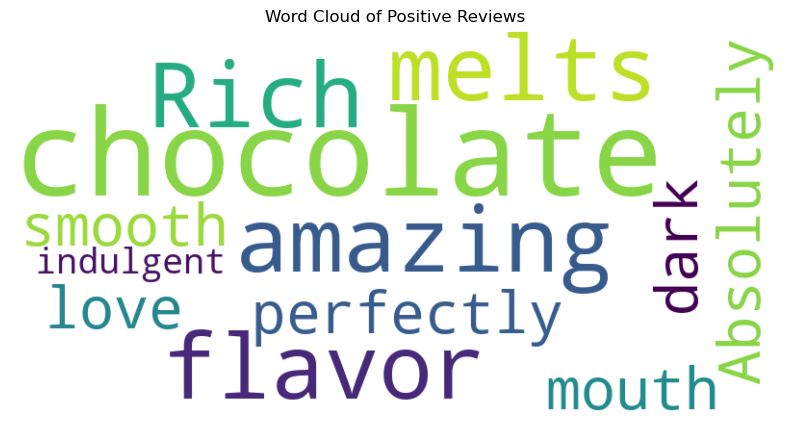

In [22]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This chocolate is amazing! Rich flavor and melts perfectly in the mouth.",
    "The taste was terrible and the texture was grainy.",
    "It’s okay, nothing special but not the worst I’ve had.",
    "Absolutely love this dark chocolate! So smooth and indulgent.",
    "Not worth the price. Very disappointing and lacked real cocoa taste."
]

classified_reviews=[]
positive_text=""

print("Review Sentiment Classification:\n")
for review in reviews:
    blob=TextBlob(review)
    polarity=blob.sentiment.polarity
    subjectivity=blob.sentiment.subjectivity

    if polarity>0.1:
        sentiment="Positive"
        positive_text += review + " "
    elif polarity<-0.1:
        sentiment="Negative"
    else:
        sentiment="Neutral"

    print(f"Review: \"{review}\"")
    print(f"Polarity: {polarity:.2f}, Subjectivity: {subjectivity:.2f}, Classified as: {sentiment}\n")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
text="""Black holes are incredibly dense regions in space where gravity is so strong that nothing, 
not even light, can escape their pull.
They form when massive stars collapse under their own gravity at the end of their life cycle. 
The boundary around a black hole is called the event horizon, beyond which nothing can return. 
The center of a black hole, known as the singularity, 
is where matter is thought to be infinitely compressed.
Black holes come in various sizes, from stellar-mass black holes to supermassive ones found at the centers of galaxies, 
playing a key role in shaping the structure of the universe."""

tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])

sequences=[]
words=text.split()
for i in range(1, len(words)):
    seq=words[:i+1]  
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    sequences.append(tokenized_seq)

padded_sequences = pad_sequences(sequences)
print(padded_sequences)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

X, y = padded_sequences[:, :-1], padded_sequences[:, -1]
y = np.array(y)

model=Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=10, input_length=X.shape[1]))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.fit(X, y, epochs=100, verbose=1)

def generate_text(seed_text, max_sequence_len, n_words=5):
    result=seed_text
    for _ in range(n_words):
        token_list=tokenizer.texts_to_sequences([result])[0]
        token_list=pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted=np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word= tokenizer.index_word.get(predicted[0], '')  # fallback if word not found
        result+=" "+output_word
    return result



seed_word = "black holes"
generated_text = generate_text(seed_word, X.shape[1])
print("Generated text:\n", generated_text)

## this above para is limited thats why words are repeating 
# to improve add more data or para..


[[ 0  0  0 ...  0  2  5]
 [ 0  0  0 ...  2  5 16]
 [ 0  0  0 ...  5 16 17]
 ...
 [ 0  0  2 ...  1 72  4]
 [ 0  2  5 ... 72  4  1]
 [ 2  5 16 ...  4  1 73]]
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 4.3039
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.3010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4.2982
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.2946
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.2892
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.2830
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.2786
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.2639
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 4.2311
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.1761
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 4.1304
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 4.0791
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 4.